## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization.In this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute.

## Question 1 Text Classification

In the first question you will be dealing with 20 News Group Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on the News Group Dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

The 20 newsgroups dataset comprises around 20000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date.

Link to the original dataset: http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups

You can also import the dataset from sklearn.datasets

In [1]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.tokenize import  word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')


C:\Users\raghu\AppData\Local\Temp\ipykernel_48248\4133866900.py:11: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raghu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raghu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Import the 20 news group dataset utilizing sklearn library

mydata_train = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)

mydata_test = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)


In [3]:
# Print the news groups(target) in the dataset

pprint(list(mydata_train.target_names))
pprint(list(mydata_test.target_names))

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [4]:
# What is the type of 'mydata_train' and 'mydata_test'

print(type(mydata_train))
print(type(mydata_test))

<class 'sklearn.utils._bunch.Bunch'>
<class 'sklearn.utils._bunch.Bunch'>


In [5]:
# Check the length of the data

print(len(mydata_train.data))
print(len(mydata_train.filenames))
print(len(mydata_test.data))
print(len(mydata_test.filenames))

11314
11314
7532
7532


### Expected Output:
11314

11314

7532

7532

## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref:https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/#:~:text=Bag%20of%20Words%20just%20creates,less%20important%20ones%20as%20well.

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

In [6]:
text = mydata_train.data
test = mydata_test.data

## Preprocessing the Corpus

In [7]:
from collections import OrderedDict

# Preprocessing the data
lines = []
word_list = []

for line in text:
    #tokenize the text documents and update the lists word_list and lines
    # Remove non-alphanumeric characters for clean tokenization
    line = re.sub(r'[^a-zA-Z0-9\s]', '', line)
    # Convert to lowercase to ensure uniformity
    line = line.lower()
    # Tokenize the text document
    tokens = word_tokenize(line)
    # Update the lines list with token lists
    lines.append(tokens)
    # Update the word_list with tokens
    word_list.extend(tokens)


# Make sure the word_list contains unique tokens
word_list = list(OrderedDict.fromkeys(word_list))

# Calculate the total documents present in the corpus
total_docs = len(text)

#Create a dictionary to keep track of index of each word
dict_idx = {word: idx for idx, word in enumerate(word_list)}

print("Lines:", lines[:2])
print("Word List:", word_list[:20])
print("Total Documents:", total_docs)
print("Dictionary Index:", list(dict_idx.items())[:20])

Lines: [['from', 'lerxstwamumdedu', 'wheres', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntppostinghost', 'rac3wamumdedu', 'organization', 'university', 'of', 'maryland', 'college', 'park', 'lines', '15', 'i', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'i', 'saw', 'the', 'other', 'day', 'it', 'was', 'a', '2door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', '60s', 'early', '70s', 'it', 'was', 'called', 'a', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'i', 'know', 'if', 'anyone', 'can', 'tellme', 'a', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'email', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your

In [8]:
# Variable for test data
test_lines = []  # This will store the tokenized version of each document in the test set
test_word_list = []  # This will store all the tokens found in the test set, though you may not need this unless building a test-specific vocabulary

for line in test:
    # Preprocess and tokenize the text documents in the test set
    line = re.sub(r'[^a-zA-Z0-9\s]', '', line).lower()
    tokens = word_tokenize(line)
    test_lines.append(tokens)
    test_word_list.extend(tokens)

# If you need to ensure uniqueness within the test_word_list (though typically, you'd use the training set's vocabulary for vectorization):
test_word_list = list(OrderedDict.fromkeys(test_word_list))


# Calculate the total documents present in the corpus
test_total_docs = len(test)


print("Test Lines Sample:", test_lines[:2])
print("Word List:", test_word_list[:20])
print("Total Documents:", test_total_docs)



Test Lines Sample: [['from', 'v064mb9kubvmsdccbuffaloedu', 'neil', 'b', 'gandler', 'subject', 'need', 'info', 'on', '8889', 'bonneville', 'organization', 'university', 'at', 'buffalo', 'lines', '10', 'newssoftware', 'vaxvms', 'vnews', '141', 'nntppostinghost', 'ubvmsdccbuffaloedu', 'i', 'am', 'a', 'little', 'confused', 'on', 'all', 'of', 'the', 'models', 'of', 'the', '8889', 'bonnevilles', 'i', 'have', 'heard', 'of', 'the', 'le', 'se', 'lse', 'sse', 'ssei', 'could', 'someone', 'tell', 'me', 'the', 'differences', 'are', 'far', 'as', 'features', 'or', 'performance', 'i', 'am', 'also', 'curious', 'to', 'know', 'what', 'the', 'book', 'value', 'is', 'for', 'prefereably', 'the', '89', 'model', 'and', 'how', 'much', 'less', 'than', 'book', 'value', 'can', 'you', 'usually', 'get', 'them', 'for', 'in', 'other', 'words', 'how', 'much', 'are', 'they', 'in', 'demand', 'this', 'time', 'of', 'year', 'i', 'have', 'heard', 'that', 'the', 'midspring', 'early', 'summer', 'is', 'the', 'best', 'time', 'to

In [9]:
# Create a frequency dictionary

def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    freq_word = {}
    for tokens in lines:
        unique_tokens = set(tokens)  # Convert list of tokens to a set for uniqueness
        for token in unique_tokens:
            if token not in freq_word:
                freq_word[token] = 1
            else:
                freq_word[token] += 1
    return freq_word

In [10]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)
freq_word

{'front': 324,
 'lerxstwamumdedu': 2,
 'whatever': 402,
 'i': 8941,
 'rest': 428,
 'of': 9882,
 'maryland': 98,
 'out': 3531,
 'sports': 100,
 'were': 2494,
 'anyone': 2071,
 'your': 3287,
 'production': 101,
 'called': 779,
 'wheres': 20,
 '15': 880,
 'lerxst': 2,
 'late': 242,
 'what': 4323,
 'college': 517,
 'looked': 272,
 'a': 9871,
 'really': 1598,
 'funky': 7,
 '70s': 48,
 'is': 8580,
 'organization': 10862,
 'doors': 64,
 'could': 2309,
 'can': 4799,
 'addition': 210,
 'please': 1662,
 'be': 6428,
 'early': 363,
 'tellme': 2,
 'enlighten': 27,
 'if': 5821,
 'separate': 176,
 'all': 4373,
 'made': 1099,
 'small': 588,
 'rac3wamumdedu': 6,
 'it': 7764,
 'years': 1337,
 'know': 3283,
 'in': 9445,
 'subject': 11314,
 'model': 297,
 'to': 9865,
 'lines': 11277,
 'saw': 368,
 'thing': 1193,
 'bricklin': 4,
 'university': 4428,
 'me': 3857,
 'from': 11314,
 'where': 1806,
 'car': 555,
 'neighborhood': 30,
 'thanks': 1720,
 'have': 6687,
 'specs': 108,
 'other': 2846,
 'my': 4447,
 'da

In [11]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''
    word_count = document.count(word)
    # Calculate total number of words in the document
    # print('Number of times the word appears in the document:'+ str(word_count))
    total_words = len(document)
    # Calculate term frequency
    # print('Total number of words in the document:'+ str(total_words))
    tf = word_count / total_words if total_words > 0 else 0

    return tf

In [12]:
word = 'them'
tf = term_frequency(test[2], word)
tf

0.0

In [13]:
import math
# Create a function to calculate the Inverse Document Frequency
total_docs = len(text)
def inverse_df(word,):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    doc_containing_word = freq_word.get(word, 0)
    # Calculate IDF
    idf = math.log((total_docs / (doc_containing_word + 1))) + 1
    return idf

In [14]:
word = 'to'
idf = inverse_df(word)
print(f"Inverse Document Frequency of '{word}' is: {idf}")

Inverse Document Frequency of 'to' is: 1.1369463941094173


In [15]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence,dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    # Initialize a vector with zeros of the length equal to the number of unique words
    tf_idf_vec = [0] * len(dict_idx)

    # Assuming freq_word and total_docs are available from previous calculations
    global freq_word, total_docs

    # Calculate TF-IDF for each word in the sentence
    for word in set(sentence):  # Use set to avoid recalculating for duplicate words
        if word in dict_idx:
            tf = term_frequency(sentence, word)
            idf = inverse_df(word)  # Ensure this function is defined to calculate IDF
            # Calculate TF-IDF and place it in the corresponding position in the vector
            tf_idf_vec[dict_idx[word]] = tf * idf

    return tf_idf_vec

In [16]:
import json

# Assuming 'lines' is your list of tokenized documents
tokenized_text_file = 'tokenized_texts.json'

# Writing 'test_lines' to a JSON file
with open(tokenized_text_file, 'w') as file:
    json.dump(lines, file)

print(f"Tokenized texts have been saved to {tokenized_text_file}.")

# Reading the tokenized texts back from the JSON file
with open(tokenized_text_file, 'r') as file:
    lines_reloaded = json.load(file)

print("Tokenized texts have been reloaded from the file.")

# Assuming 'lines' is your list of tokenized documents
tokenized_train_file = 'tokenized_train.json'

# Writing 'lines' to a JSON file
with open(tokenized_train_file, 'w') as file:
    json.dump(test_lines, file)

print(f"Tokenized texts have been saved to {tokenized_train_file}.")

# Reading the tokenized texts back from the JSON file
with open(tokenized_train_file, 'r') as file:
    train_lines_reloaded = json.load(file)

print("Tokenized texts have been reloaded from the file.")




Tokenized texts have been saved to tokenized_texts.json.
Tokenized texts have been reloaded from the file.
Tokenized texts have been saved to tokenized_train.json.
Tokenized texts have been reloaded from the file.


In [17]:
# Make sure to redefine or import your 'tfidf' function and 'dict_idx' as needed

# Compute the TF-IDF vectors for the reloaded tokenized texts
tf_idf_vectors = np.array([tfidf(doc, dict_idx) for doc in lines_reloaded])
tf_idf_vectors_train =np.array([tfidf(doc, dict_idx) for doc in train_lines_reloaded])
print("TF-IDF vectors have been computed for the reloaded tokenized texts.")


TF-IDF vectors have been computed for the reloaded tokenized texts.


In [18]:
print(tf_idf_vectors_train.shape)
print(tf_idf_vectors.shape)


(7532, 138740)
(11314, 138740)


## Multinomial Naive Bayes (10 Points)

In [19]:
#Fit a Multinomial Naive Bayes Model on our dataset
  
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes model
model = MultinomialNB()
y_train= mydata_train.target
# Fit the model on the training dataset
# Assuming tf_idf_matrix is your training feature set and y_train contains the corresponding labels
model.fit(tf_idf_vectors, y_train)



MultinomialNB()

In [20]:
#Perform testing on the train dataset

pred = model.predict(tf_idf_vectors_train)

In [21]:
print(len(mydata_train.target), len(pred))


11314 7532


In [23]:
from sklearn.metrics import f1_score, accuracy_score

#Calculate the F1 Score and the Accuracy
F1_score = f1_score(mydata_test.target, pred, average='weighted')
Accuracy = accuracy_score(mydata_test.target, pred)
print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)

F1 Score:  0.7581103761029917
Accuracy:  0.774429102496017


### Expected Output:
F1 Score: 0.9533633964397735

Accuracy: 0.9524482941488421

Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly.
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [26]:
# install libraries
# pip3 install wikipedia

SyntaxError: invalid syntax (2215913165.py, line 2)

In [31]:
import wikipedia
from wikipedia.exceptions import WikipediaException

'''
 Generate a list of wikipedia article to cluster
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science",
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund",
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with.
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
topics = ["European Central Bank", "Bank", "Financial technology","International Monetary Fund", "Basketball", "Football", "College Football", "Association Football"]

# list of articles to be downloaded
articles = []
# For each topic, search for related articles and add them to the articles list
for topic in topics:
    try:
        search_results = wikipedia.search(topic, results=5)  # Adjust results as needed
        articles.extend(search_results[:3])  # Take the top 3 results for diversity
    except WikipediaException as e:
        print(f"Error searching for articles related to {topic}: {e}")

# Now, articles contains titles of Wikipedia articles to be fetched
print(f"List of article titles to be downloaded: {articles}")

# download and store articles (summaries) in this variable
data = []
for article in articles:
    try:
        summary = wikipedia.summary(article)
        data.append(summary)  # Append the summary directly to the data list
    except WikipediaException as e:
        print(f"Error fetching summary for {article}: {e}")

# Verify the number of summaries fetched
print(f"Successfully fetched summaries for {len(data)} articles.")


List of article titles to be downloaded: ['European Central Bank', 'Central bank', 'President of the European Central Bank', 'Bank', 'West Bank', 'BANK (art collective)', 'Fintech', 'Financial technology in India', 'Finance', 'International Monetary Fund', 'Pakistan and the International Monetary Fund', 'Romania and the International Monetary Fund', 'Basketball', 'National Basketball Association', 'College basketball', 'Football', 'Association football', 'National Football League', 'College football', 'College Football Playoff', 'Boston College Eagles football', 'Association football', 'The Football Association', 'FIFA']
Error fetching summary for FIFA: "F2F" may refer to: 
Friend-to-friend
P2P network
 FAI
F2F (TV series)
"F2F" (song)
Grumman F2F
Face to Face (disambiguation)
supply chain management
Differential Manchester encoding
Successfully fetched summaries for 23 articles.


### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):**

In [44]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


def clean_message(messages):
    # Initialize lemmatizer and stopwords
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    
    preprocessed = []
    for message in messages:
        # Tokenize the message
        tokens = word_tokenize(message)
        # Clean and lemmatize the tokens
        cleaned_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens
                          if token.lower() not in stop_words and token.isalpha()]
        preprocessed.append(' '.join(cleaned_tokens))
    return preprocessed

preprocessed_data = clean_message(data)
# Display the first preprocessed summary for verification
preprocessed_data[0]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\raghu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raghu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\raghu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'european central bank ecb prime component eurosystem european system central bank escb well one seven institution european union one world important central bank ecb governing council make monetary policy eurozone european union administers foreign exchange reserve eu member state engages foreign exchange operation defines intermediate monetary objective key interest rate eu ecb executive board enforces policy decision governing council may direct national central bank ecb exclusive right authorise issuance euro banknote member state issue euro coin volume must approved ecb beforehand bank also operates payment system ecb established treaty amsterdam may purpose guaranteeing maintaining price stability december treaty lisbon became effective bank gained official status eu institution ecb created covered eurozone eleven member since greece joined january slovenia january cyprus malta january slovakia january estonia january latvia january lithuania january croatia january current presi

### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(preprocessed_data)


In [46]:
print(X.shape)

(23, 1383)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [51]:
# Generate group labels based on the topics list
group_labels = []
for topic in topics:
    group_labels += [topic] * 3  # 3 articles per topic as mentioned

In [52]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
# call TSNE() to fit the data

# Assuming `X` is your vectorized text data from TfidfVectorizer or CountVectorizer
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, init='pca', n_iter=2500, perplexity=3)
tsne_results = tsne_model.fit_transform(X.toarray())  # T-SNE operates on dense arrays, hence the conversion


[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 23 samples in 0.001s...
[t-SNE] Computed neighbors for 23 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 23 / 23
[t-SNE] Mean sigma: 0.257676
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.769821
[t-SNE] KL divergence after 2050 iterations: 0.160284


Plot and annotate the points with different markers for different expected groups.

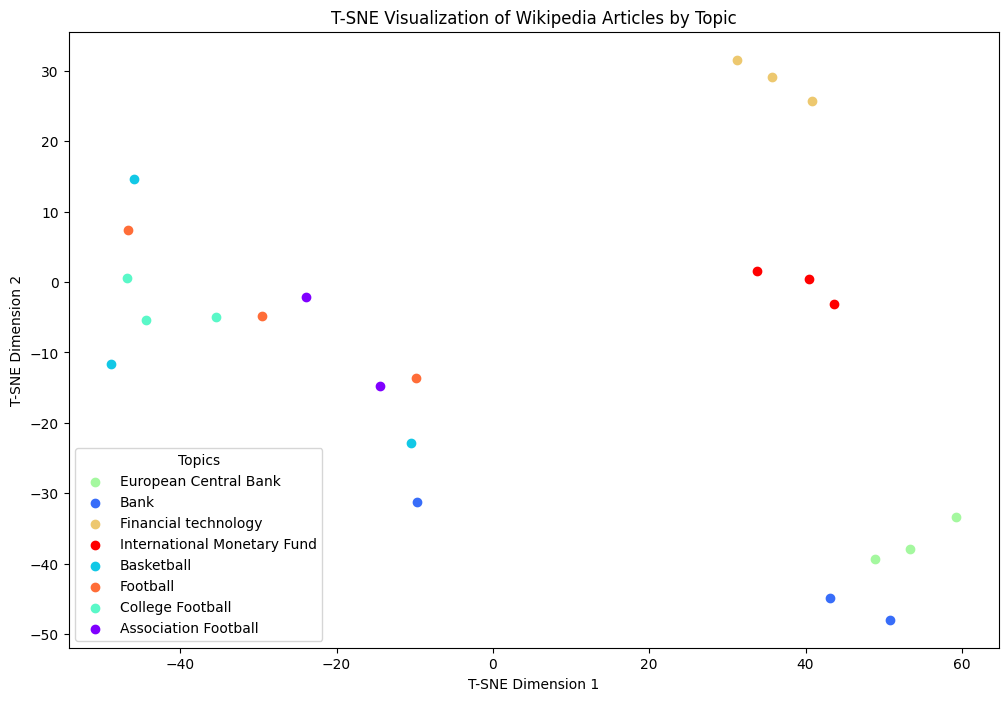

In [53]:

# Unique topics for legend
unique_topics = np.unique(topics)

# Map each topic to a color
colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_topics)))
color_map = dict(zip(unique_topics, colors))

# Plot each point with annotations
plt.figure(figsize=(12, 8))
for i, (x_coord, y_coord) in enumerate(tsne_results):
    plt.scatter(x_coord, y_coord, color=color_map[group_labels[i]], label=group_labels[i])

# Create legend without duplicates
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title="Topics")

plt.title('T-SNE Visualization of Wikipedia Articles by Topic')
plt.xlabel('T-SNE Dimension 1')
plt.ylabel('T-SNE Dimension 2')
plt.show()



**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)


The T-SNE plot visualizes the Wikipedia articles by topic, where each color represents a different topic category. Based on the plot, we can make several observations:

Clusters of Related Topics: Articles under certain topics appear to cluster together, indicating that T-SNE has successfully captured similarities within these groups. For example, we see clusters among articles related to sports (e.g., "Basketball," "Football," "College Football," "Association Football") which suggests that T-SNE has identified the semantic relationships between articles within the same broader category.

Separation Between Different Topics: There is a clear separation between articles from distinct categories such as finance-related topics (e.g., "European Central Bank," "Bank," "Financial technology," "International Monetary Fund") and sports-related topics (e.g., "Basketball," "Football"). This separation is a good sign that T-SNE is effectively distinguishing between unrelated topics.

Overlapping Points: While there are distinct clusters, some points representing different topics are relatively close to each other or even overlapping. This might indicate shared terminology or content between those articles, or it could be an artifact of the T-SNE dimensionality reduction process that can sometimes place dissimilar points closer together.

Outliers: There may be articles that do not cluster closely with others from the same topic (outliers), which may have unique content not shared with other articles in the topic or may be more general in nature.

Density and Distribution: The density and distribution of points can tell us about the variance within topics. Topics that are represented by tightly clustered points may have less variance in their content than topics with more spread-out points.

From this plot, it can be concluded that T-SNE has done a reasonable job at categorizing the articles into distinct groups based on their content similarity. However, for a comprehensive analysis, one would need to review the articles and possibly conduct a more in-depth analysis, possibly with additional contextual metadata, to fully understand the nature of the clusters and any overlaps or outliers.

**Answer(1-3 sentences):**  
  


# Question 3 Building Neural Networks

### We are gonna use Emotions Dataset for this task. We need to classify the given text into different kind of emotions like happy,sad,anger etc..,

### We are providing train.txt and val.txt files along with this notebook.

### Library Imports and Utility functions

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import numpy as np
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\raghu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\raghu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\raghu\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [37]:
# Import the train.txt and val.txt file into pandas dataframe format
# train
train_df = pd.read_csv('C:/Users/raghu/Downloads/NLP_Ass2/train-1.txt',delimiter=';', header=None, names=['text', 'label'])
# validation
val_df = pd.read_csv('C:/Users/raghu/Downloads/NLP_Ass2/val-1.txt', delimiter=';', header=None, names=['text', 'label'])


# Print out the shapes
print(f'Train shape: {train_df.shape}')
print(f'Validation shape: {val_df.shape}')

# expected shape of train dataset is (16000,2) and validation dataset is (2000,2)

Train shape: (16000, 2)
Validation shape: (2000, 2)


In [38]:
# clean the text in the train and validation dataframes using the clean_text function provided above

train_df['text'] = train_df['text'].apply(clean_text)
val_df['text'] = val_df['text'].apply(clean_text)



In [78]:
# initialise count vectorizer from sklearn module with default parameter
count_vect = CountVectorizer()

# fit on train dataset and transform both train and validation dataset
X_train_counts = count_vect.fit_transform(train_df['text']).toarray()
X_val_counts = count_vect.transform(val_df['text']).toarray()

In [79]:
# initialise tfidf vectorizer from sklearn module with default parameter
tfidf_vectorizer = TfidfVectorizer()

# fit on train dataset and transform both train and validation dataset
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['text']).toarray()
X_val_tfidf = tfidf_vectorizer.transform(val_df['text']).toarray()

In [80]:
# initialise label encoder from sklearn module
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# fit on train labels and transform both train and validation labels
train_labels_encoded = label_encoder.fit_transform(train_df['label'])

# Transform both the training and validation datasets
val_labels_encoded = label_encoder.transform(val_df['label'])

In [81]:
from tensorflow.keras.utils import to_categorical
# convert the labels into one hot encoding form
train_labels_one_hot = to_categorical(train_labels_encoded)
val_labels_one_hot = to_categorical(val_labels_encoded)

In [82]:
print(train_df.columns)

Index(['text', 'label'], dtype='object')


In [83]:
print(train_df.head())

                                                text    label
0                              didnt feel humiliated  sadness
1  go feeling hopeless damned hopeful around some...  sadness
2          im grabbing minute post feel greedy wrong    anger
3  ever feeling nostalgic fireplace know still pr...     love
4                                    feeling grouchy    anger


In [85]:
num_classes = train_labels_one_hot.shape[1]
print(num_classes)


6


### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (20 points)

In [86]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):

  # layer 1 : input layer
  inp = tf.keras.Input((X.shape[1],))
  # layer 2 : add the dense layer with 2048 units and relu activation
  x = layers.Dense(2048, activation='relu')(inp)
  # layer 3 : add the dropout layer with dropout rate of 0.5
  x = layers.Dropout(0.5)(x)
  # layer 4 : add the dense layer with 1024 units with tanh activation and with l2 regularization
  x = layers.Dense(1024, activation='tanh', kernel_regularizer=regularizers.l2(0.01))(x)
  # layer 5 : add the dropout layer with dropout rate of 0.5
  x = layers.Dropout(0.5)(x)
  # layer 6 : add the dense layer with 512 units with tanh activation and with l2 regularization
  x = layers.Dense(512, activation='tanh', kernel_regularizer=regularizers.l2(0.01))(x)
  # layer 7 : add the dropout layer with dropout rate of 0.5
  x = layers.Dropout(0.5)(x)
  # layer 8 : add the dense layer with 256 units with tanh activation and with l2 regularization
  x = layers.Dense(256, activation='tanh', kernel_regularizer=regularizers.l2(0.01))(x)
  # layer 9 : add the dropout layer with dropout rate of 0.5
  x = layers.Dropout(0.5)(x)
  # layer 10 : add the dense layer with 128 units with tanh activation and with l2 regularization
  x = layers.Dense(128, activation='tanh', kernel_regularizer=regularizers.l2(0.01))(x)
  # layer 11 : add the dropout layer with dropout rate of 0.5
  x = layers.Dropout(0.5)(x)
  # layer 12 : output layer with units equal to number of classes and activation as softmax
  output = layers.Dense(6, activation='softmax')(x)
  # use loss as categorical crossentropy, optimizer as rmsprop and evaluate model on auc,precision,recall,accuracy
  model = models.Model(inputs=inp, outputs=output)
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['AUC', 'Precision', 'Recall', 'Accuracy'])
  return model


In [87]:
# call the build_model function and initialize the model

model = build_model(X_train_counts)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 13457)]           0         
                                                                 
 dense_36 (Dense)            (None, 2048)              27561984  
                                                                 
 dropout_30 (Dropout)        (None, 2048)              0         
                                                                 
 dense_37 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_31 (Dropout)        (None, 1024)              0         
                                                                 
 dense_38 (Dense)            (None, 512)               524800    
                                                                 
 dropout_32 (Dropout)        (None, 512)               0   

In [90]:
# train and validate the model on the count vectors of text which we have created initially for 10 epochs,
# adjust batch size according to your computation power (suggestion use : 8)

# Train the model
history = model.fit(X_train_counts, train_labels_one_hot,
                    epochs=10,
                    batch_size=20,
                    validation_data=(X_val_counts, val_labels_one_hot),
                    verbose=1)



Epoch 1/10
2000/2000 [==============================] - 225s 112ms/step - loss: 2.3381 - auc: 0.8001 - precision: 0.6143 - recall: 0.1690 - Accuracy: 0.4306 - val_loss: 1.2745 - val_auc: 0.8848 - val_precision: 0.8135 - val_recall: 0.3250 - val_Accuracy: 0.5920
Epoch 2/10
2000/2000 [==============================] - 230s 115ms/step - loss: 1.2705 - auc: 0.8899 - precision: 0.7223 - recall: 0.4688 - Accuracy: 0.6239 - val_loss: 1.2251 - val_auc: 0.9036 - val_precision: 0.7264 - val_recall: 0.5815 - val_Accuracy: 0.6810
Epoch 3/10
2000/2000 [==============================] - 260s 130ms/step - loss: 1.1743 - auc: 0.9113 - precision: 0.7443 - recall: 0.5744 - Accuracy: 0.6747 - val_loss: 1.1582 - val_auc: 0.9154 - val_precision: 0.7704 - val_recall: 0.5840 - val_Accuracy: 0.7110
Epoch 4/10
2000/2000 [==============================] - 224s 112ms/step - loss: 1.1123 - auc: 0.9230 - precision: 0.7628 - recall: 0.6203 - Accuracy: 0.7048 - val_loss: 1.1823 - val_auc: 0.9141 - val_precision: 0.7

ValueError: too many values to unpack (expected 2)

In [98]:
evaluation_results = model.evaluate(X_val_counts, val_labels_one_hot, verbose=1)
val_loss = evaluation_results[0]
val_auc = evaluation_results[1]
val_precision = evaluation_results[2]
val_recall = evaluation_results[3]
val_accuracy = evaluation_results[4]
print(f'Validation Loss: {evaluation_results[0]}')
print(f'Validation AUC: {evaluation_results[1]}')
print(f'Validation Precision: {evaluation_results[2]}')
print(f'Validation Recall: {evaluation_results[3]}')
print(f'Validation Accuracy: {evaluation_results[4]}')

63/63 [==============================] - 1s 20ms/step - loss: 1.1221 - auc: 0.9249 - precision: 0.7756 - recall: 0.6655 - Accuracy: 0.7170
Validation Loss: 1.1220964193344116
Validation AUC: 0.9249208569526672
Validation Precision: 0.7756410241127014
Validation Recall: 0.6654999852180481
Validation Accuracy: 0.7170000076293945


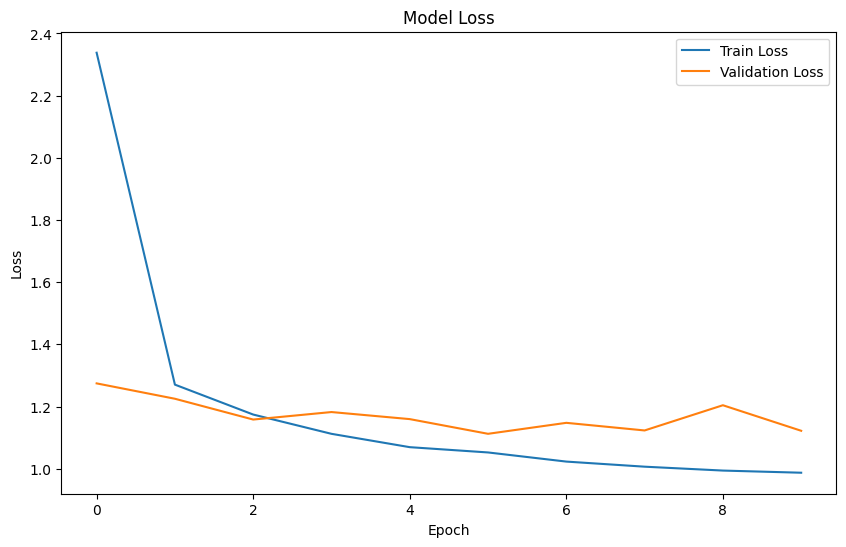

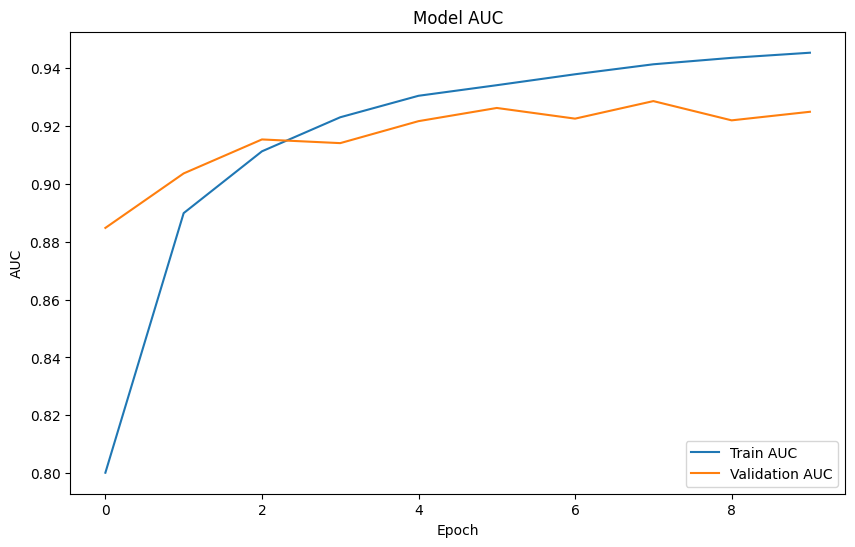

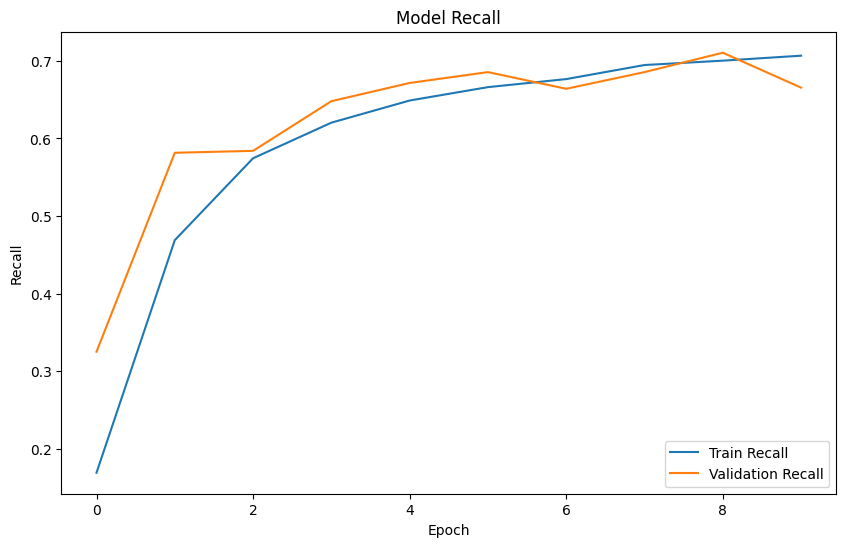

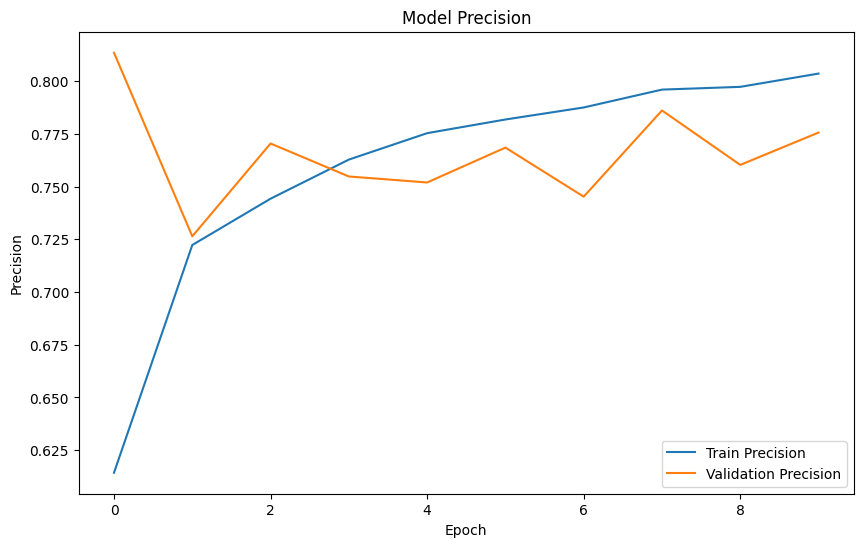

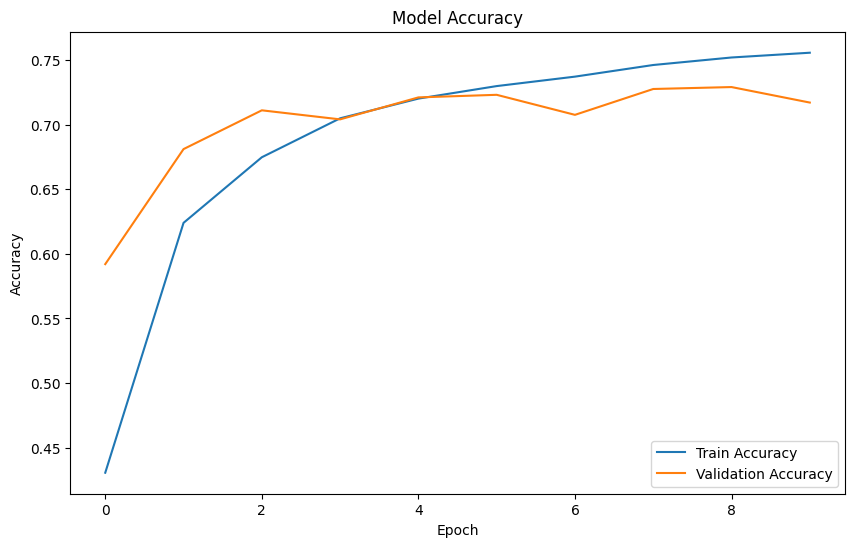

In [99]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot training & validation AUC
plt.figure(figsize=(10, 6))
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation Recall
plt.figure(figsize=(10, 6))
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation Precision
plt.figure(figsize=(10, 6))
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation Accuracy
# Note: Depending on how you compiled your model, this might be 'accuracy' or 'acc'

plt.figure(figsize=(10, 6))
plt.plot(history.history['Accuracy'], label='Train Accuracy')
plt.plot(history.history['val_Accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


## Observations model_count_vectorizer
Based on the plots provided for the model trained on the count vectorized dataset, here are some observations:

### Model Loss
- **Training Loss** decreases rapidly initially and then continues to decrease at a slower pace, indicating that the model is learning and improving its predictions on the training data.
- **Validation Loss** decreases initially alongside the training loss but starts to plateau. This pattern suggests that the model may be beginning to overfit to the training data, as the validation loss is not continuing to decrease at the same rate as the training loss.

### Model AUC
- **Training AUC** shows a steady increase, which is a good sign that the model's ability to discriminate between the positive and negative classes is improving with each epoch on the training set.
- **Validation AUC** also increases, but the rate of increase slows down, and it begins to plateau. There is a noticeable gap between the training and validation AUC, which may indicate some overfitting, although the validation AUC remains relatively high.

### Model Recall
- **Training Recall** increases and then stabilizes, suggesting that the model's ability to identify all relevant instances in the training set is improving and reaching a point of stability.
- **Validation Recall** increases but then starts to fluctuate. This fluctuation can be due to the model's performance variability on the validation set, potentially due to overfitting or the model's sensitivity to the specific composition of the validation set.

### Model Precision
- **Training Precision** improves significantly over the epochs, indicating that the model is getting better at making correct positive predictions on the training set.
- **Validation Precision** shows an initial increase but then starts to fluctuate. The fluctuations and the overall lower precision compared to the training precision suggest that the model is less reliable in its positive predictions on the validation set.

### Model Accuracy
- **Training Accuracy** shows a consistent increase, which indicates that the model is correctly predicting the labels for a higher percentage of the training set over time.
- **Validation Accuracy** increases but then begins to level off and even decrease slightly. This pattern may suggest that the model is not generalizing as well as it could to new data, which is often a sign of overfitting.

### General Observations
- The model is learning and improving on the training data across all metrics, as indicated by decreasing loss and increasing AUC, recall, precision, and accuracy.
- The validation metrics' trends suggest that the model might be overfitting to the training data. The plateauing and fluctuations in validation loss, recall, precision, and accuracy point to the model's reduced ability to generalize to unseen data.
- To address potential overfitting, you might consider strategies such as introducing regularization (e.g., L2 regularization), using dropout layers, reducing the complexity of the model, or implementing early stopping to halt training when the validation metrics cease to improve.
- The model's performance on the validation set, particularly in terms of AUC, suggests that the model has good predictive power. However, the signs of overfitting should be addressed to improve the model's generalization capabilities.

In [102]:
# again call the build_model function and initialize the model
model_tfidf = build_model(X_train_tfidf)
model_tfidf.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 13457)]           0         
                                                                 
 dense_54 (Dense)            (None, 2048)              27561984  
                                                                 
 dropout_45 (Dropout)        (None, 2048)              0         
                                                                 
 dense_55 (Dense)            (None, 1024)              2098176   
                                                                 
 dropout_46 (Dropout)        (None, 1024)              0         
                                                                 
 dense_56 (Dense)            (None, 512)               524800    
                                                                 
 dropout_47 (Dropout)        (None, 512)               0   

In [104]:
# train and validate the model on the tfidf vectors of text which we have created initially for 10 epochs,
# adjust batch size according to your computation power (suggestion use : 8)
# Train the model
history_tfidf = model_tfidf.fit(X_train_tfidf, train_labels_one_hot,
                    epochs=10,
                    batch_size=20,
                    validation_data=(X_val_tfidf, val_labels_one_hot),
                    verbose=1)

Epoch 1/10
800/800 [==============================] - 94s 116ms/step - loss: 2.2430 - auc: 0.8038 - precision: 0.4872 - recall: 0.1033 - Accuracy: 0.3842 - val_loss: 1.2957 - val_auc: 0.8587 - val_precision: 0.5371 - val_recall: 0.3255 - val_Accuracy: 0.4590
Epoch 2/10
800/800 [==============================] - 93s 116ms/step - loss: 1.1651 - auc: 0.8967 - precision: 0.6975 - recall: 0.4201 - Accuracy: 0.5904 - val_loss: 1.1396 - val_auc: 0.9102 - val_precision: 0.7500 - val_recall: 0.5820 - val_Accuracy: 0.6690
Epoch 3/10
800/800 [==============================] - 93s 117ms/step - loss: 1.0194 - auc: 0.9308 - precision: 0.8126 - recall: 0.6112 - Accuracy: 0.7172 - val_loss: 1.1348 - val_auc: 0.9122 - val_precision: 0.8204 - val_recall: 0.5345 - val_Accuracy: 0.6865
Epoch 4/10
800/800 [==============================] - 94s 118ms/step - loss: 0.9628 - auc: 0.9427 - precision: 0.8352 - recall: 0.6543 - Accuracy: 0.7531 - val_loss: 1.0919 - val_auc: 0.9249 - val_precision: 0.8248 - val_re

In [112]:
evaluation_results_tfidf = model_tfidf.evaluate(X_val_counts, val_labels_one_hot, verbose=1)
val_loss = evaluation_results_tfidf[0]
val_auc = evaluation_results_tfidf[1]
val_precision = evaluation_results_tfidf[2]
val_recall = evaluation_results_tfidf[3]
val_accuracy = evaluation_results_tfidf[4]
print(f'Validation Loss: {evaluation_results_tfidf[0]}')
print(f'Validation AUC: {evaluation_results_tfidf[1]}')
print(f'Validation Precision: {evaluation_results_tfidf[2]}')
print(f'Validation Recall: {evaluation_results_tfidf[3]}')
print(f'Validation Accuracy: {evaluation_results_tfidf[4]}')

63/63 [==============================] - 1s 19ms/step - loss: 4.6243 - auc: 0.7297 - precision: 0.4244 - recall: 0.4025 - Accuracy: 0.4205
Validation Loss: 4.624263286590576
Validation AUC: 0.7296618819236755
Validation Precision: 0.4243542551994324
Validation Recall: 0.4025000035762787
Validation Accuracy: 0.4205000102519989


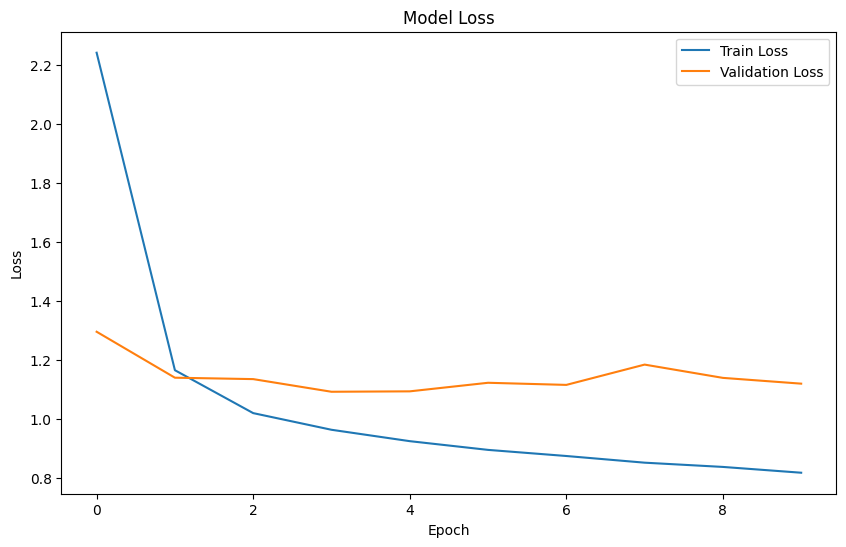

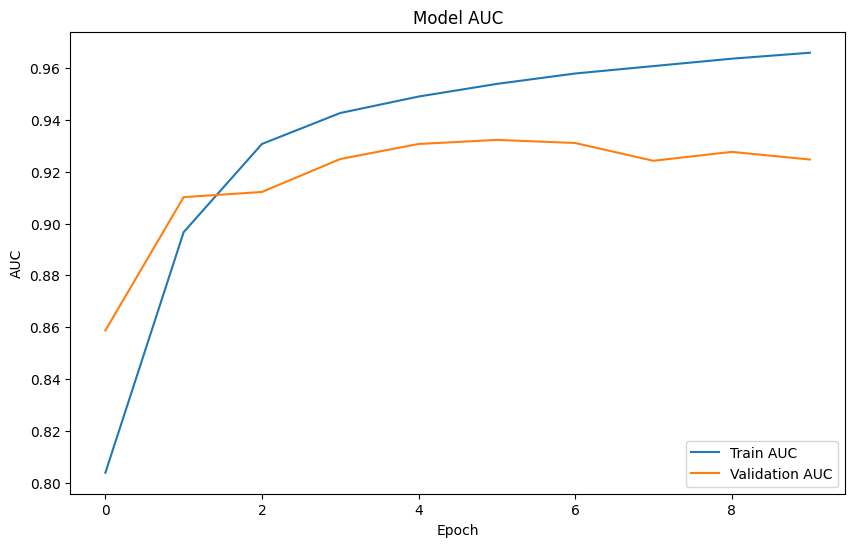

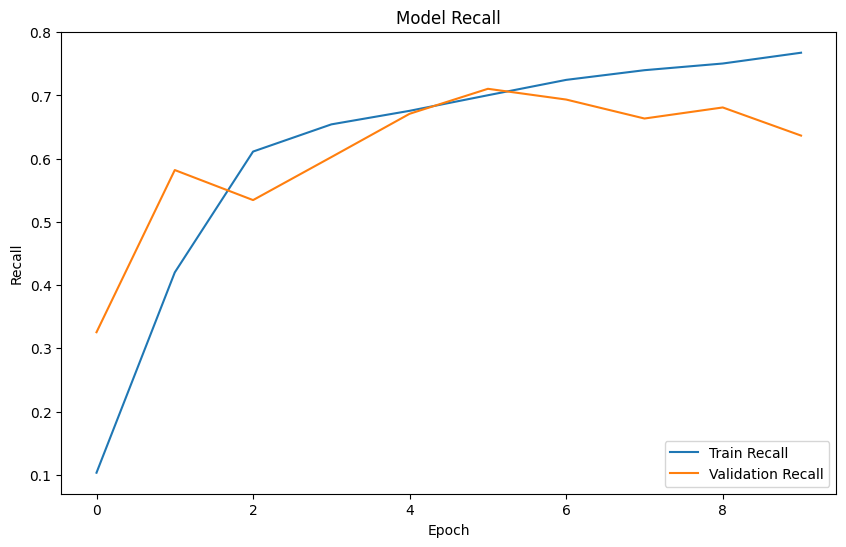

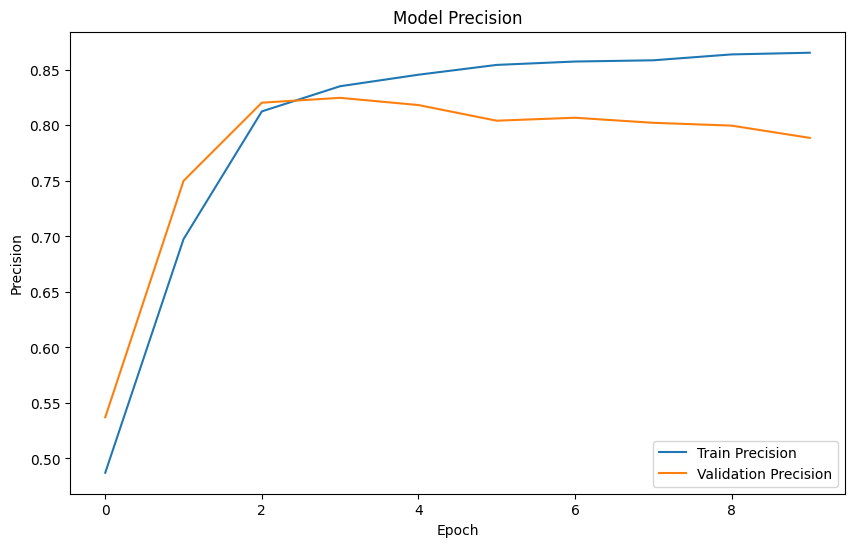

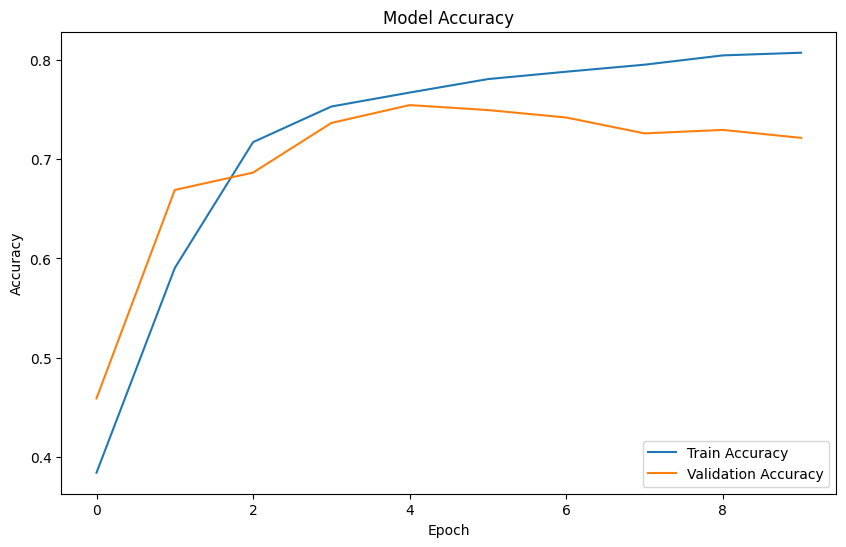

In [113]:
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations
# plot train loss vs val loss, train auc vs val auc, train recall vs val recall, train precision vs val precision and train accuracy vs val accuracy and comment your observations
import matplotlib.pyplot as plt
history = history_tfidf
# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot training & validation AUC
plt.figure(figsize=(10, 6))
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('Model AUC')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation Recall
plt.figure(figsize=(10, 6))
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation Precision
plt.figure(figsize=(10, 6))
plt.plot(history.history['precision'], label='Train Precision')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plot training & validation Accuracy
# Note: Depending on how you compiled your model, this might be 'accuracy' or 'acc'

plt.figure(figsize=(10, 6))
plt.plot(history.history['Accuracy'], label='Train Accuracy')
plt.plot(history.history['val_Accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()


## Observations-model_tfidf

Based on the graphs you've provided for the model trained on a TF-IDF dataset, here are some observations and interpretations for each of the metrics:

### Model Loss
- **Training Loss** is steadily decreasing, which typically indicates that the model is learning and improving in its ability to fit the training data over epochs.
- **Validation Loss** starts to plateau or increase slightly after a certain number of epochs. This could be a sign of overfitting, where the model is becoming too specialized to the training data and is losing its generalization ability on the validation data.

### Model AUC (Area Under the ROC Curve)
- **Training AUC** is increasing, which suggests that the model's ability to distinguish between classes is improving for the training set.
- **Validation AUC** also increases but seems to level off. The gap between training and validation AUC suggests the model may be overfitting. However, the validation AUC is still quite high, which indicates good model performance.

### Model Recall
- **Training Recall** is improving, showing that the model is getting better at correctly identifying positive cases in the training set.
- **Validation Recall** also improves but starts to level off or decrease, indicating that while the model's ability to find all positive samples in the training set is increasing, it may not be improving in the same way on the validation set.

### Model Precision
- **Training Precision** is increasing, which indicates that the model is becoming more precise in its predictions on the training set, with fewer false positives.
- **Validation Precision** shows an initial increase but then a decrease, suggesting that the model is starting to make more false positive errors on the validation set as training progresses.

### Model Accuracy
- **Training Accuracy** shows a steady increase, which is expected as the model becomes better at predicting the correct labels for the training data.
- **Validation Accuracy** starts to plateau and then slightly decrease, which again suggests potential overfitting. The model's generalization to new data might not be improving after a certain point.

### General Observations
- The model appears to be learning and improving on the training data across all metrics.
- There is a consistent trend where validation metrics begin to plateau or slightly worsen after a certain number of epochs, which could indicate the model is starting to overfit.
- It might be beneficial to implement some form of regularization, such as dropout or L2 regularization, to mitigate overfitting. Additionally, early stopping could be introduced to stop training once the validation metrics stop improving.
- Since the model's performance on the validation set is still relatively good, especially in terms of AUC, the model is likely to be quite robust. However, fine-tuning and regularization could help improve its generalization even further.

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:**
The differences among Count Vectorizer, TF-IDF, Word2Vec, and GloVe primarily revolve around how they represent text data for machine learning models. Each technique has its unique approach to converting text into numerical vectors, capturing different aspects of the text's information.

### Count Vectorizer (Bag of Words)

- **Basic Idea**: Transforms text documents into vectors where each element of the vector represents the count of a particular word in the document. It's a form of the Bag of Words model.
- **Features**: Generates a vocabulary of all unique words across documents and uses word counts as features.
- **Pros**: Simple and easy to understand and implement. Good for small datasets.
- **Cons**: Ignores word order and context. Treats every word independently and gives equal importance to all words, which can be a disadvantage for understanding the semantics of the text. It also leads to sparse matrices, which can be inefficient for large vocabularies.

### TF-IDF (Term Frequency-Inverse Document Frequency)

- **Basic Idea**: Similar to Count Vectorizer but with an additional layer that reduces the weight of words that appear frequently across documents (thus are less informative) while increasing the weight of words that appear less frequently.
- **Features**: Considers both the frequency of words in a specific document and their frequency across all documents to assign weights to words.
- **Pros**: More informative than simple counts as it helps differentiate documents based on unique words. Reduces the problem of common words that are not useful for classification.
- **Cons**: Still ignores the context and order of words. The representation can still be sparse for large vocabularies.

### Word2Vec

- **Basic Idea**: A predictive model that uses neural networks to learn word associations from a large corpus of text. It represents words in a continuous vector space where semantically similar words are mapped to proximate points.
- **Features**: Generates dense word embeddings (i.e., dense vectors for words) based on the context in which words appear. Offers two architectures: Continuous Bag of Words (CBOW) and Skip-Gram.
- **Pros**: Captures semantic relationships between words and the context in which they appear. Dense representation is more efficient than sparse matrices.
- **Cons**: Requires a large amount of text data to train effectively. Does not directly encode meaning beyond word-level associations (e.g., sentence or document level).

### GloVe (Global Vectors for Word Representation)

- **Basic Idea**: An unsupervised learning algorithm for obtaining vector representations for words by aggregating global word-word co-occurrence statistics from a corpus. The model then learns word vectors such that their dot product equals the logarithm of the words' probability of co-occurrence.
- **Features**: Combines the advantages of matrix factorization techniques (like those used in latent semantic analysis) with the local context-based learning of Word2Vec.
- **Pros**: Captures both global statistics and local context, leading to rich word embeddings that reflect both semantic and syntactic similarities.
- **Cons**: Like Word2Vec, requires a large corpus for training to capture rich word embeddings. Does not inherently handle polysemy (words with multiple meanings).

### Summary

- **Count Vectorizer and TF-IDF** are simpler, traditional methods focusing on word frequency but lacking in capturing word context or semantic relationships.
- **Word2Vec and GloVe** provide dense word embeddings that capture semantic relationships based on word usage in context, offering more nuanced text representations that can significantly improve the performance of many NLP tasks. However, they require more computational resources to train and manage.

What is the significant difference between the Naive Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**
Naive Bayes is a simple yet effective probabilistic machine learning model used for classification tasks, particularly in text classification. The significant difference between using Bag of Words (BoW) and TF-IDF (Term Frequency-Inverse Document Frequency) with Naive Bayes lies in how they represent text data and the weight they assign to each word in the text. Both methods convert text into numerical features that Naive Bayes can use for classification, but they do so in different ways that can impact the model's performance and interpretation of the text.

### Bag of Words (BoW)

1. **Representation**: BoW models text data by creating a vocabulary of all unique words in the training set and then counting how many times each word appears in each document. Each document is represented as a vector, with each element of the vector corresponding to the count of a word in the document.
   
2. **Word Weights**: In BoW, all words are treated equally, with their counts directly used as features. This can sometimes be a limitation because common words (e.g., "the", "is", "and") that appear in many documents but may not be informative about the document's content, receive the same treatment as less frequent but more meaningful words.

3. **Pros**: Simplicity and ease of implementation. BoW is straightforward to understand and implement, making it a popular choice for initial explorations of text data.
   
4. **Cons**: Ignores word context and document length, and treats common words as equally important as rare words, which can sometimes lead to suboptimal performance, especially in datasets with diverse document lengths and vocabularies.

### TF-IDF

1. **Representation**: TF-IDF stands for Term Frequency-Inverse Document Frequency. It not only considers how often a word appears in a document (term frequency) but also how unique the word is across all documents in the corpus (inverse document frequency). This results in a weighted count where more unique words are given higher importance.
   
2. **Word Weights**: TF-IDF decreases the weight of words that appear very frequently across documents (thus considered less informative) and increases the weight of words that appear less frequently. This helps in distinguishing documents based on the more unique words they contain.

3. **Pros**: By considering both the frequency of words and their distribution across documents, TF-IDF can lead to better performance in many text classification tasks. It helps in handling the common words problem by giving more weight to words that are likely to be more informative about the content of each document.
   
4. **Cons**: More complex than BoW, both in terms of understanding and computation. It also still ignores the order of words, so the context is not captured.

### Summary

- **Use of BoW vs. TF-IDF with Naive Bayes** can significantly impact model performance. TF-IDF generally provides better results for text classification because it emphasizes unique words that help distinguish between documents of different classes.
- **Choice of Representation**: The choice between BoW and TF-IDF often depends on the specific dataset and task. For some datasets, the simplicity of BoW might be sufficient and more computationally efficient, while for others, the additional insights provided by TF-IDF might lead to better classification accuracy.
- **Context and Semantics**: It's important to note that both BoW and TF-IDF largely ignore the order of words and, therefore, the context and semantics conveyed by that order. Advanced models like word embeddings and deep learning approaches can capture this information, providing even better performance for many tasks.